In [1]:
import numpy as np
import pandas as pd
import metachange

from sklearn.ensemble import RandomForestClassifier

D:\INCAS-TA1-Code\CSCI653\confusion_multi_change-master\metachange\model_tf.py:180: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  if(name not in self.data): raise NameError('Illegal dataset name %s'(name))
D:\INCAS-TA1-Code\CSCI653\confusion_multi_change-master\metachange\model_tf.py:342: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  if(name not in self.data): raise NameError('Illegal dataset name %s'(name))


Single change point detection

In [2]:
X = np.array([[0,1]]*1000 + [[1,0]]*1000)
t = np.arange(2000)*1./2000

In [3]:
clf_rf = RandomForestClassifier(max_depth=32, criterion="entropy", random_state=0)
res_rf = metachange.meta_change_detect_np(X, t, clf_rf)

trial   0
t0 = 0.5113, alpha = 1.0000
trial   1
t0 = 0.4990, alpha = 1.0000
trial   2
t0 = 0.4927, alpha = 1.0000
trial   3
t0 = 0.4982, alpha = 1.0000
trial   4
t0 = 0.5036, alpha = 0.9809
trial   5
t0 = 0.5023, alpha = 0.9918
t0 = 0.5012 +- 0.0057
alpha = 0.9954 +- 0.0072


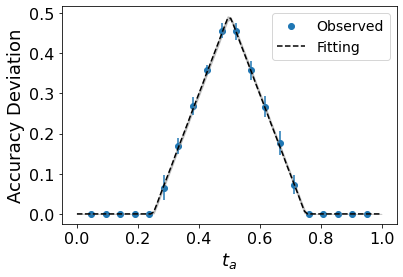

In [4]:
metachange.plot_curves(res_rf)

Multiple change point detection

In [5]:
X = np.array([[0,1]]*500 + [[1,0]]*500 + [[2,0]]*500 + [[2,1]]*500)
t = np.arange(2000)*1./2000

In [6]:
clf_rf = RandomForestClassifier(max_depth=32, criterion="entropy", random_state=0)
res_multi = metachange.change_point_tree(X, t, clf_rf, min_range=0.20)

{'t_left': 0.0, 't_right': 0.9995}
trial   0
t_i = 0.0927, maj = 0.8978, acc = 0.8978, accdev =  0.0000
t_i = 0.1834, maj = 0.8180, acc = 0.9377, accdev =  0.1197
t_i = 0.2740, maj = 0.7157, acc = 0.9601, accdev =  0.2444
t_i = 0.3647, maj = 0.6409, acc = 0.8853, accdev =  0.2444
t_i = 0.4554, maj = 0.5387, acc = 0.9501, accdev =  0.4115
t_i = 0.5461, maj = 0.5486, acc = 0.9626, accdev =  0.4140
t_i = 0.6368, maj = 0.6409, acc = 0.8853, accdev =  0.2444
t_i = 0.7275, maj = 0.7357, acc = 0.9800, accdev =  0.2444
t_i = 0.8181, maj = 0.8204, acc = 0.9352, accdev =  0.1147
t_i = 0.9088, maj = 0.9102, acc = 0.9102, accdev =  0.0000
t0 = 0.5054, alpha = 1.0000
trial   1
t_i = 0.0913, maj = 0.9177, acc = 0.9177, accdev =  0.0000
t_i = 0.1820, maj = 0.8279, acc = 0.9451, accdev =  0.1172
t_i = 0.2728, maj = 0.7431, acc = 0.9701, accdev =  0.2269
t_i = 0.3636, maj = 0.6708, acc = 0.8978, accdev =  0.2269
t_i = 0.4544, maj = 0.6110, acc = 0.9426, accdev =  0.3317
t_i = 0.5451, maj = 0.5137, acc 

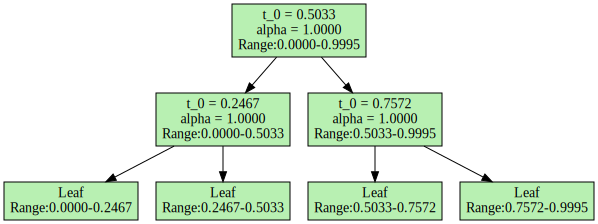

In [7]:
def make_node_text(data):
    t_left = data["t_left"]
    t_right = data["t_right"]

    if "t0" in data:
        header = f't_0 = {data["t0"]:.4f}\n alpha = {data["alpha"]:.4f}'
    else:
        header = "Leaf"
    return f"{header}\nRange:{t_left:.4f}-{t_right:.4f}"

metachange.show_tree(res_multi, make_node_text)